<a href="https://colab.research.google.com/github/rsydn9/cvkdu_dg/blob/main/CV_DG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install data-gradients &> /dev/null

In [2]:
import os

BDD_DATASET_DOWNLOAD_PATH="/home/data"

bdd_dataset_dir_path = BDD_DATASET_DOWNLOAD_PATH + os.path.sep + 'bdd_example'

if os.path.isdir(bdd_dataset_dir_path):
    print('bdd dataset already downloaded...')
else:
    print('Downloading and extracting bdd dataset to: ' + BDD_DATASET_DOWNLOAD_PATH)
    ! mkdir $BDD_DATASET_DOWNLOAD_PATH
    %cd $BDD_DATASET_DOWNLOAD_PATH
    ! wget https://deci-pretrained-models.s3.amazonaws.com/bdd_example.zip
    ! unzip --qq bdd_example.zip

/home/data
--2024-01-26 08:24:08--  https://deci-pretrained-models.s3.amazonaws.com/bdd_example.zip
Resolving deci-pretrained-models.s3.amazonaws.com (deci-pretrained-models.s3.amazonaws.com)... 16.182.37.225, 54.231.194.225, 52.217.168.25, ...
Connecting to deci-pretrained-models.s3.amazonaws.com (deci-pretrained-models.s3.amazonaws.com)|16.182.37.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2841277 (2.7M) [application/zip]
Saving to: ‘bdd_example.zip’

bdd_example.zip     100%[===================>]   2.71M  2.04MB/s    in 1.3s    

2024-01-26 08:24:11 (2.04 MB/s) - ‘bdd_example.zip’ saved [2841277/2841277]



In [3]:
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor

from data_gradients.datasets.bdd_dataset import BDDDataset

    # Create torch DataSet
train_dataset = BDDDataset(
        data_folder="/home/data/bdd_example",
        split="train",
        transform=Compose([ToTensor()]),
        target_transform=Compose([ToTensor()]),
    )
val_dataset = BDDDataset(
        data_folder="/home/data/bdd_example",
        split="val",
        transform=Compose([ToTensor()]),
        target_transform=Compose([ToTensor()]),
    )

    # Create torch DataLoader
train_loader = DataLoader(train_dataset, batch_size=8)
val_loader = DataLoader(val_dataset, batch_size=8)

In [4]:
from data_gradients.managers.segmentation_manager import SegmentationAnalysisManager
from data_gradients.datasets.segmentation.coco_segmentation_dataset import COCOSegmentationDataset

In [7]:
da = SegmentationAnalysisManager(
        report_title="Testing Data-Gradients",
        train_data=train_loader,
        val_data=val_loader,
        class_names=BDDDataset.CLASS_NAMES,
        class_names_to_use=BDDDataset.CLASS_NAMES[:-1],
        # Optionals
        images_extractor=None,
        labels_extractor=None,
        use_cache=True,
        threshold_soft_labels=0.5,
        batches_early_stop=75,
    )

  - Executing analysis with: 
  - batches_early_stop: 75 
  - len(train_data): 3 
  - len(val_data): 2 
  - log directory: /home/data/logs/Testing_Data-Gradients 
  - Archive directory: /home/data/logs/Testing_Data-Gradients/archive_20240126-083547 
  - feature extractor list: {'Image Features': [SummaryStats, ImagesResolution, ImageColorDistribution, ImagesAverageBrightness], 'Segmentation Features': [SegmentationSampleVisualization, SegmentationClassHeatmap, SegmentationClassFrequency, SegmentationClassesPerImageCount, SegmentationComponentsPerImageCount, SegmentationBoundingBoxResolution, SegmentationBoundingBoxArea, SegmentationComponentsConvexity, SegmentationComponentsErosion]}
╔══════════════════════════════════════════════════════════════════════════╗
║  To better understand how to tackle the data issues highlighted in this  ║
║  report, explore our comprehensive course on analyzing computer vision   ║
║  datasets. click here: https://hubs.ly/Q01XpHBT0                         ║

Analyzing... :   0%|          | 0/3 [00:00<?, ?it/s]


--------------------------------------------------------------------------------
In which format are your images loaded ?
--------------------------------------------------------------------------------

Options:
[0] | RGB
[1] | BGR
[2] | LAB
[3] | Other

Your selection (Enter the corresponding number) >>> 0
Great! You chose: `RGB`


Analyzing... : 20it [00:23,  1.19s/it]
Summarizing... :  50%|█████     | 1/2 [00:01<00:01,  1.76s/it]/usr/local/lib/python3.10/dist-packages/data_gradients/visualize/seaborn_renderer.py:287: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = seaborn.violinplot(**plot_args)
/usr/local/lib/python3.10/dist-packages/data_gradients/visualize/seaborn_renderer.py:287: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.4`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  ax = seaborn.violinplot(**plot_args)
Summarizing... : 100%|██████████| 2/2 [00:23<00:00, 11.57s/it]


Dataset successfully analyzed!
Starting to write the report, this may take around 10 seconds...

Your dataset evaluation has been completed!

----------------------------------------------------------------------------------------------------
Training Configuration...
`SegmentationDataConfig` cache is set to `cache_path=/root/.cache/DataGradients/Testing_Data-Gradients.json`.

----------------------------------------------------------------------------------------------------
Report Location:
    - Temporary Folder (will be overwritten next run):
        └─ /home/data/logs/Testing_Data-Gradients
                ├─ Report.pdf
                └─ summary.json
    - Archive Folder:
        └─ /home/data/logs/Testing_Data-Gradients/archive_20240126-083547
                ├─ Report.pdf
                └─ summary.json

Seen a glitch? Have a suggestion? Visit https://github.com/Deci-AI/data-gradients !


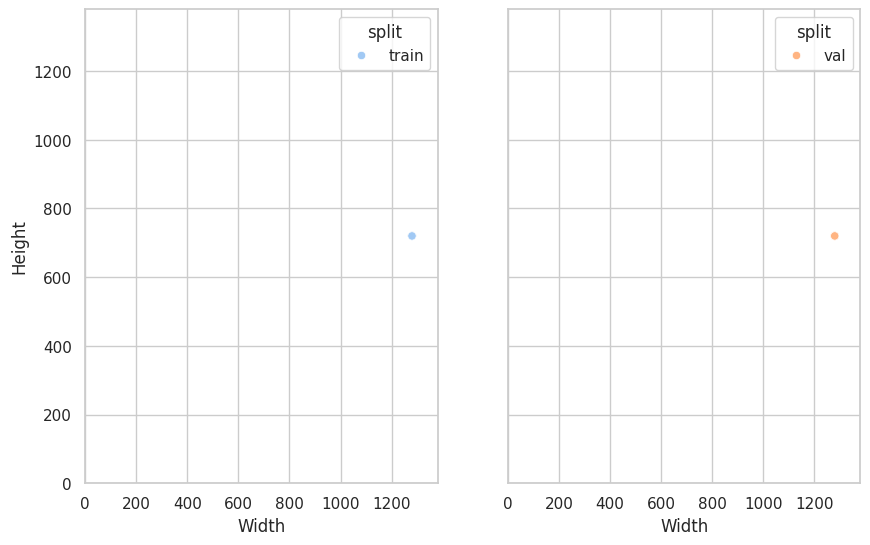

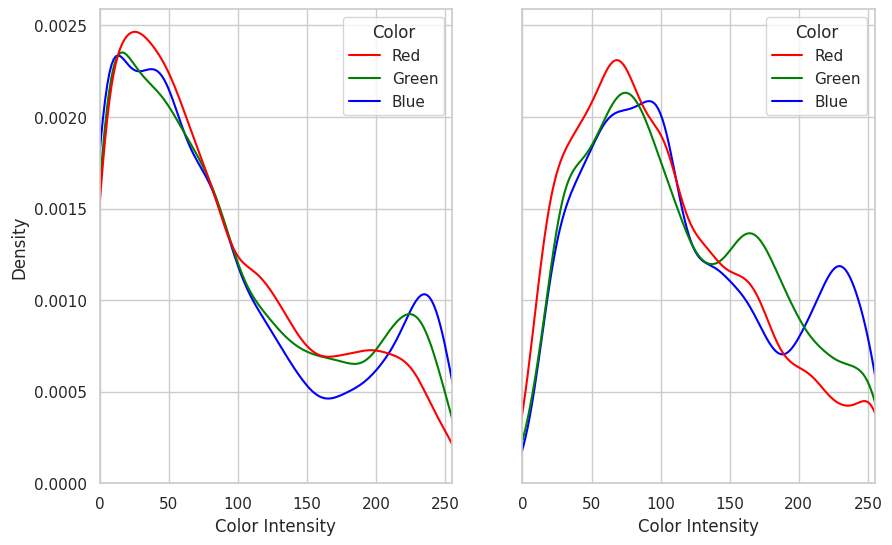

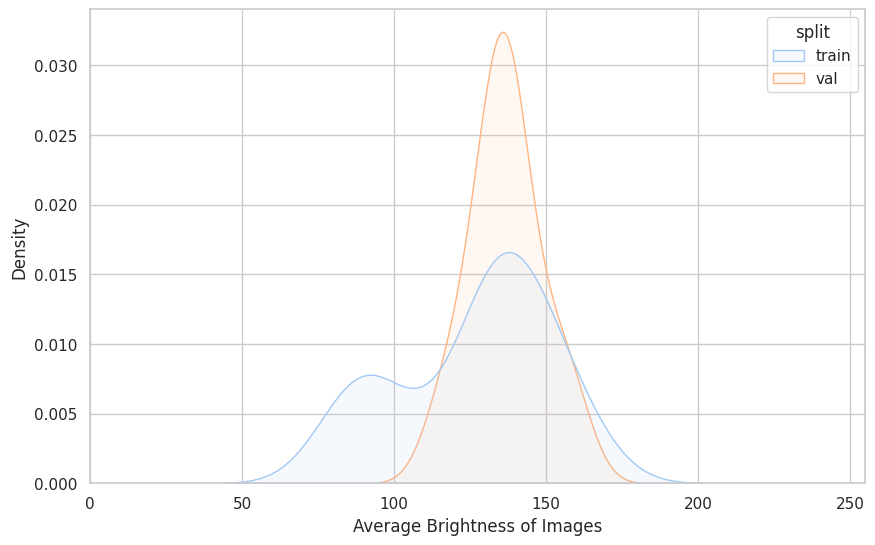

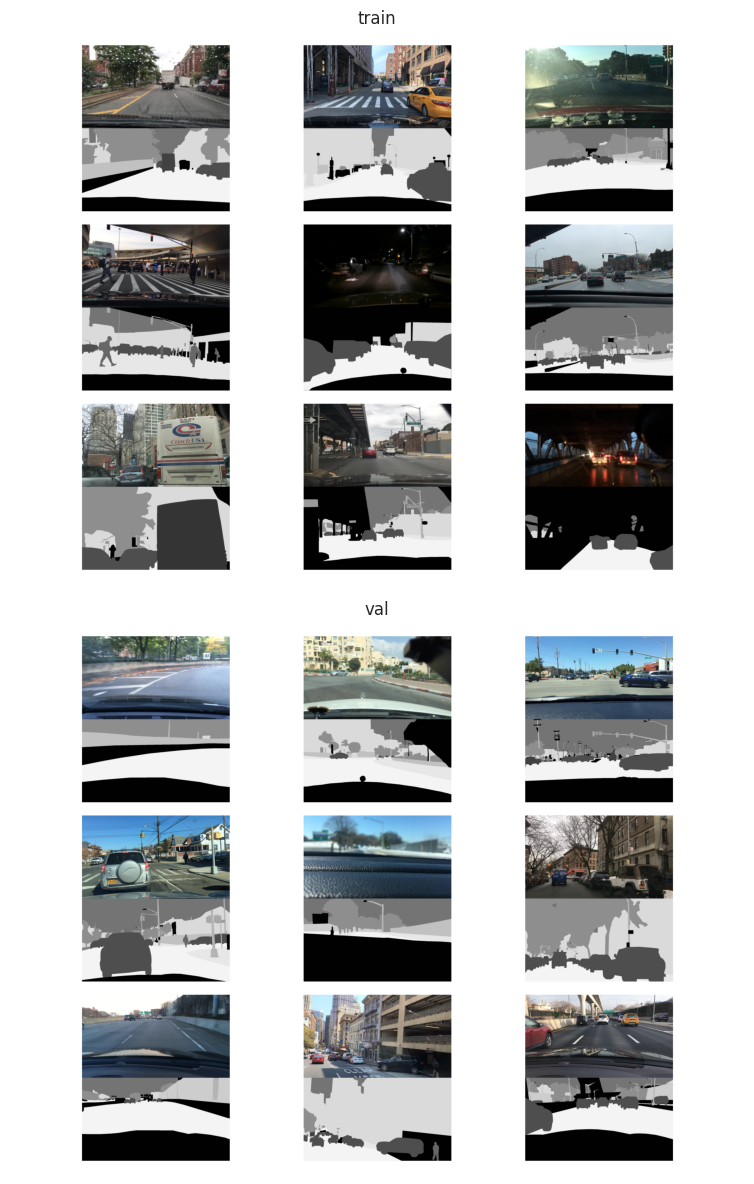

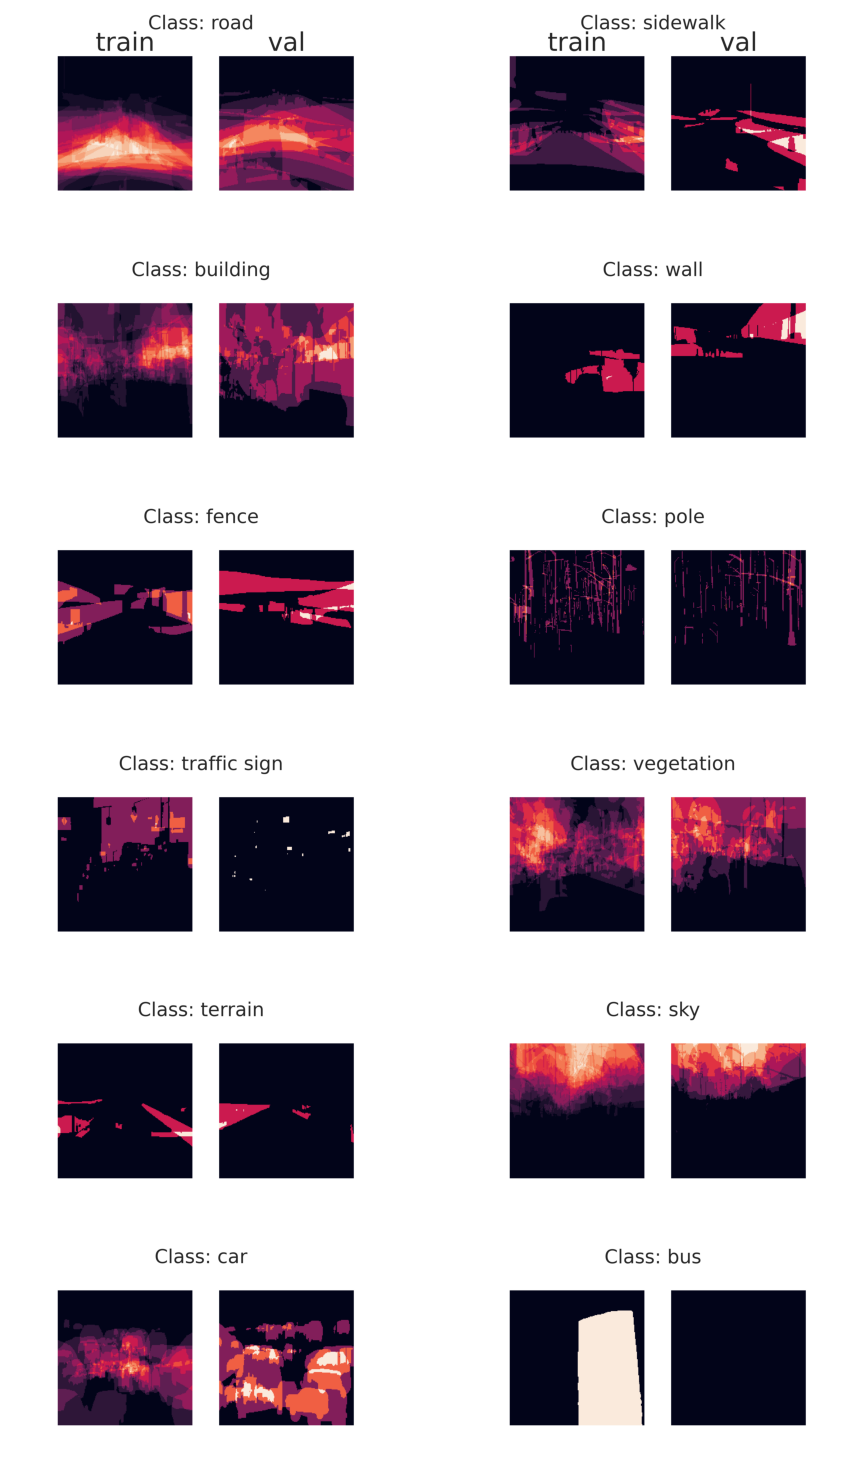

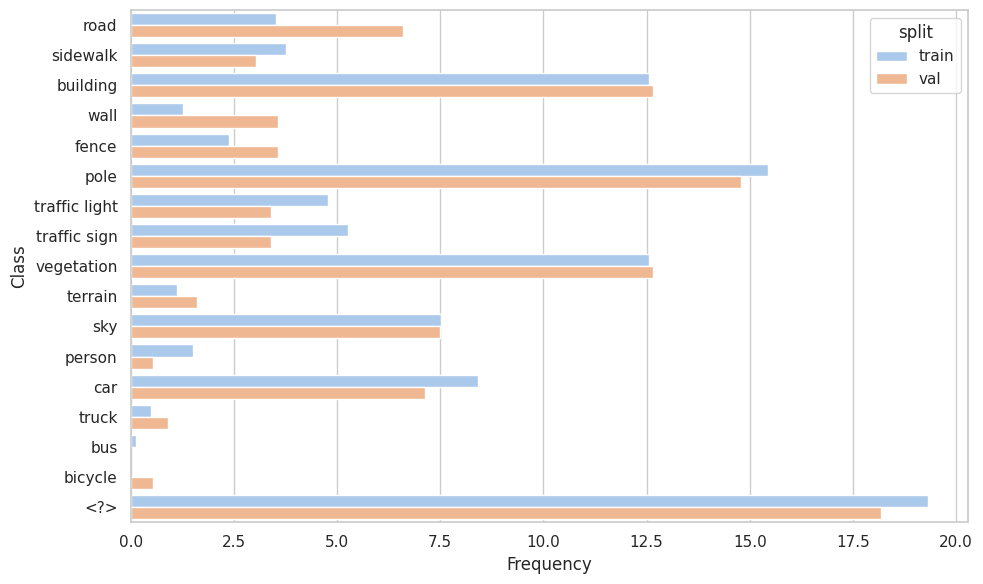

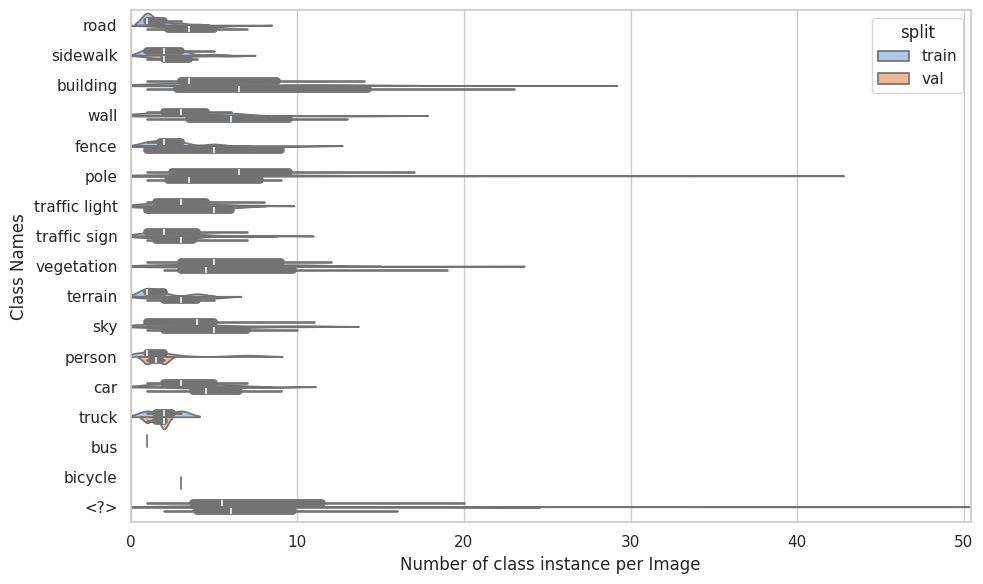

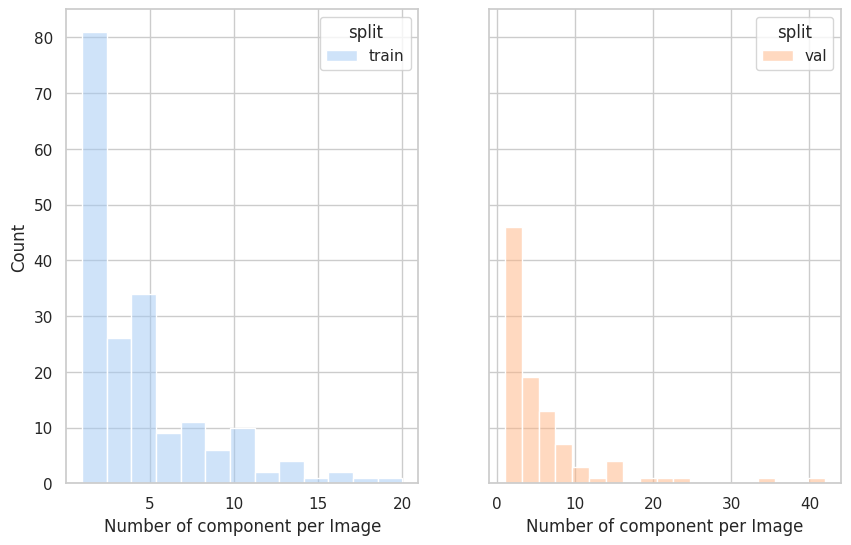

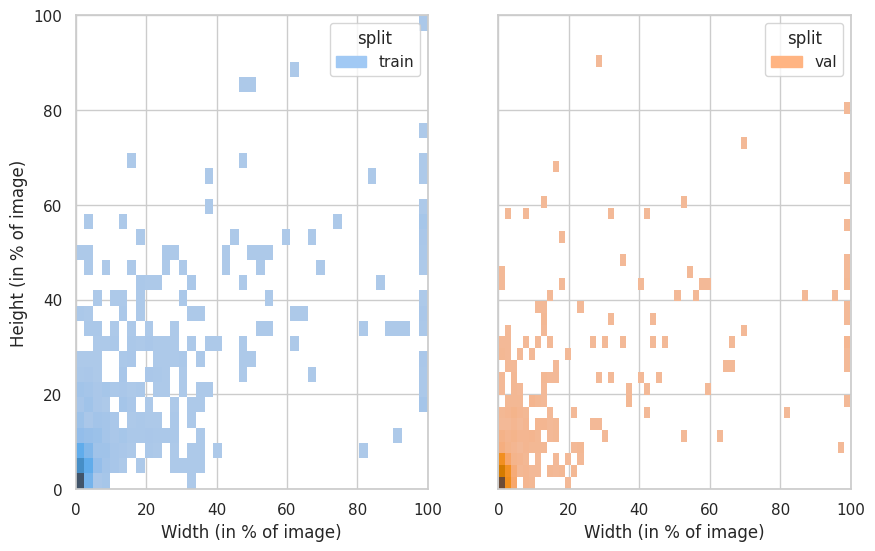

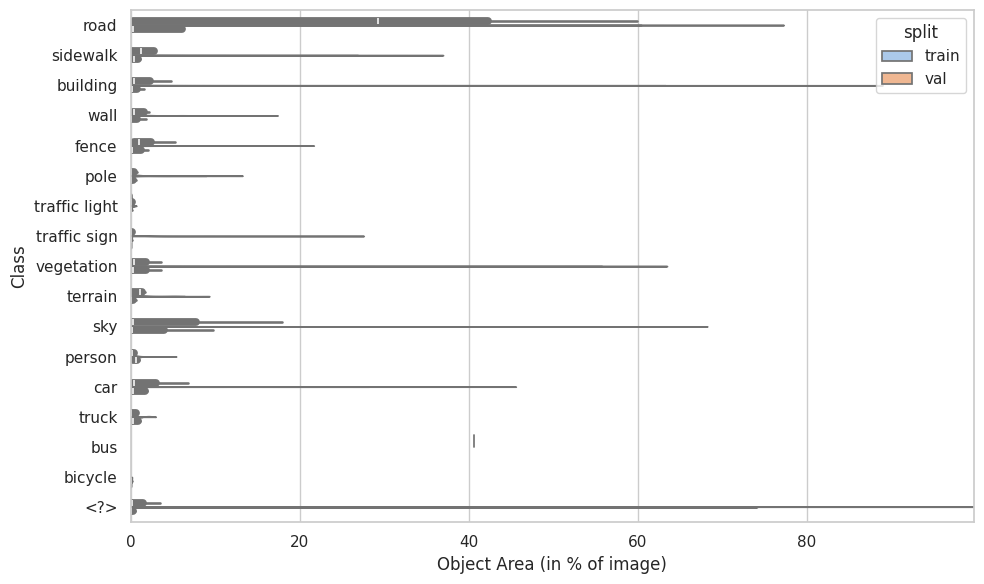

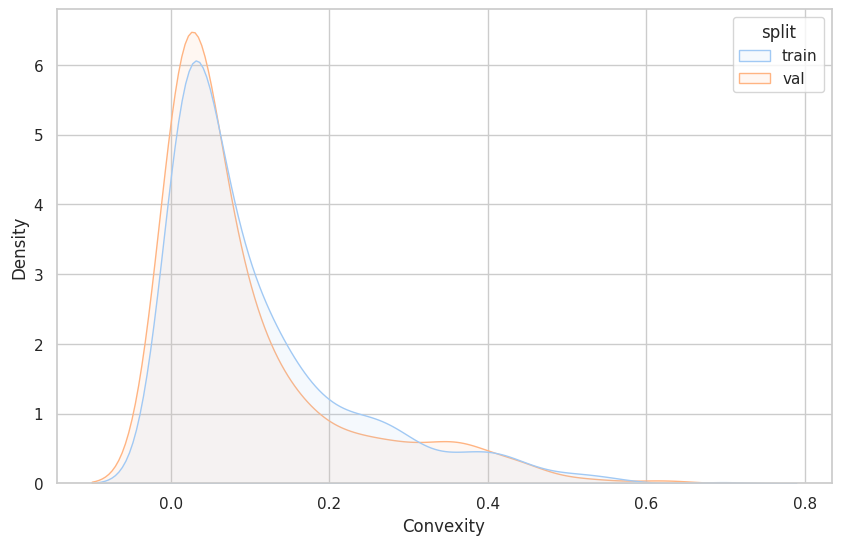

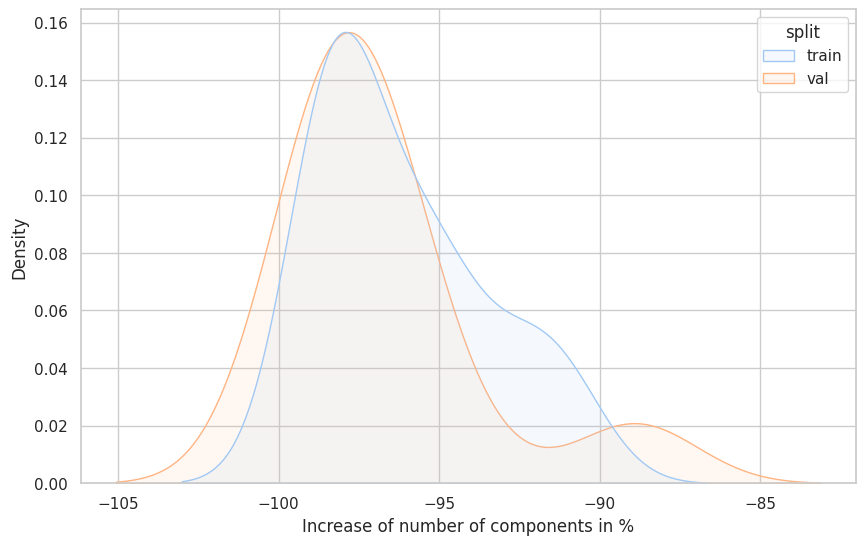

In [8]:
da.run()